In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [27]:
df = pd.read_csv('dataset/gas_turbine_fault_detection.csv')

In [28]:
df.head()

Temperature (°C)           RPM  Torque (Nm)  Vibrations (mm/s)  \
0        924.835708  15650.870645  3464.645167           1.675087   
1        893.086785  15780.755598  3190.276340           2.042084   
2        932.384427  15016.002075  3401.769251           2.006414   
3        976.151493  14623.291065  3443.024901           2.239914   
4        888.292331  15229.986071  3448.764050           1.865677   

   Power Output (MW)  Fuel Flow Rate (kg/s)  Air Pressure (kPa)  \
0          96.347590               2.265294          146.245460   
1          83.288302               2.755950          166.812134   
2         120.358735               2.574244          133.494161   
3         104.689781               2.497101          140.141635   
4          95.080431               2.763689          109.795667   

   Exhaust Gas Temperature (°C)  Oil Temperature (°C)  Fault  
0                    517.611726             90.530958      0  
1                    500.196460            136.047350      0  
2                    516.272719            124.910039      0  
3                    475.731083            123.298231      1  
4                    546.737163            119.382239      1

Ignorar columna Fault en la descripción del dataset, ya que esta es la variable target y además es binaria, por lo que los unicos datos destacables de esta variable son las proporciones que se verán a continuación

In [29]:
df.describe()

Temperature (°C)           RPM  Torque (Nm)  Vibrations (mm/s)  \
count       1386.000000   1386.000000  1386.000000        1386.000000   
mean         901.623932  15022.591497  3494.764285           1.978964   
std           49.381498    490.048647   203.828153           0.494025   
min          737.936633  13490.243922  2901.772806           0.411648   
25%          868.117411  14688.039309  3355.445978           1.658465   
50%          901.964879  15016.737353  3490.639925           1.989549   
75%          932.692748  15346.057959  3627.482077           2.322288   
max         1092.636575  16596.553784  4285.247541           3.556455   

       Power Output (MW)  Fuel Flow Rate (kg/s)  Air Pressure (kPa)  \
count        1386.000000            1386.000000         1386.000000   
mean           99.497230               2.505591          150.320568   
std            10.309697               0.316582           19.430192   
min            71.004861               1.349003           93.961769   
25%            92.387182               2.296762          137.688214   
50%            99.378143               2.500537          150.464896   
75%           106.454488               2.724751          163.130104   
max           135.290552               3.513215          213.155426   

       Exhaust Gas Temperature (°C)  Oil Temperature (°C)        Fault  
count                   1386.000000           1386.000000  1386.000000  
mean                     498.865296            120.061923     0.306638  
std                       28.793950             10.005188     0.461264  
min                      382.327992             86.244209     0.000000  
25%                      479.238499            113.652494     0.000000  
50%                      498.865627            119.968056     0.000000  
75%                      518.337798            126.570199     1.000000  
max                      587.423276            153.777682     1.000000

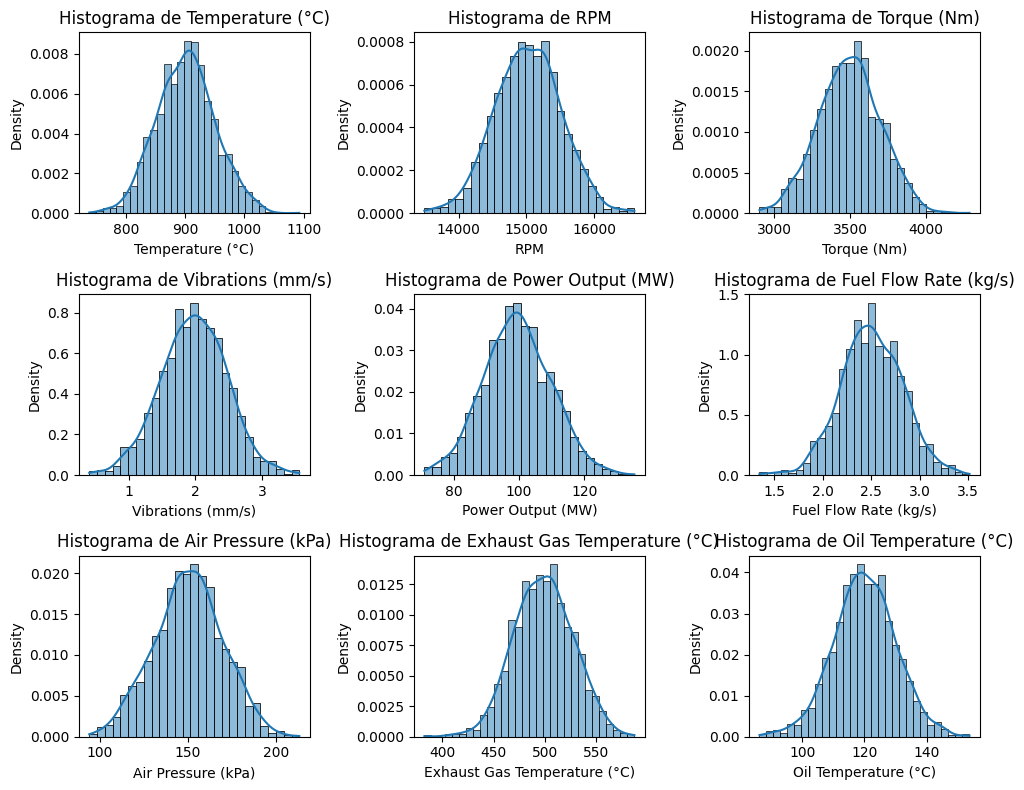

In [30]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
i = 0
j = 0

for col in df:
    if i == 3:
        break
    
    sns.histplot(data=df, x=col, kde=True, ax=axs[i, j], stat='density')
    
    axs[i, j].set_title(f'Histograma de {col}')
    axs[i, j].set_xlabel(f'{col}')
    
    j += 1
    if j == 3:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

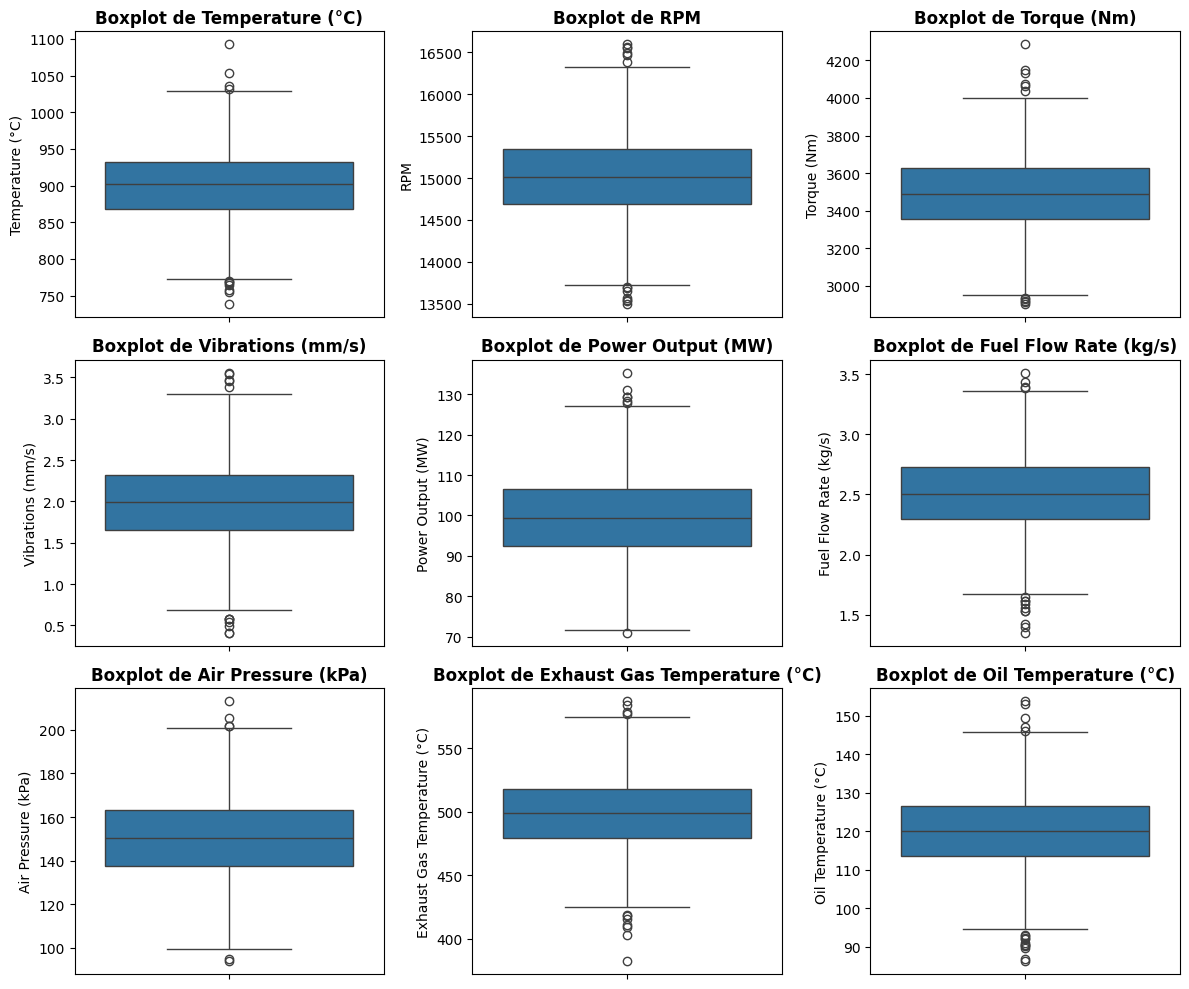

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
i = 0
j = 0

for col in df:
    if i == 3:
        break
    
    sns.boxplot(data=df, y=col, ax=axs[i, j])
    
    axs[i, j].set_title(f'Boxplot de {col}', fontweight='bold')
    axs[i, j].set_ylabel(f'{col}')
    
    j += 1
    if j == 3:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

Las variables siguen aparentemente una distribución normal, sin embargo hay presencia de outlayers. Hay que comprobar con el test de Shapiro-Wilk

In [32]:
alpha = 0.05

for col in df:
    if col == 'Fault':
        break
    stat, p = stats.shapiro(df[col])
    print(f'------{col}------')
    print(f'Estadistico W: {stat:.4f}')
    print(f'p-value: {p:.4f}')
    if p > alpha:
        print('No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal')
    else:
        print('Se rechaza la hipotesis nula y por tanto los datos no siguen una distribucion normal')


------Temperature (°C)------
Estadistico W: 0.9991
p-value: 0.7402
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------RPM------
Estadistico W: 0.9992
p-value: 0.8260
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------Torque (Nm)------
Estadistico W: 0.9991
p-value: 0.7063
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------Vibrations (mm/s)------
Estadistico W: 0.9990
p-value: 0.6231
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------Power Output (MW)------
Estadistico W: 0.9987
p-value: 0.4328
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------Fuel Flow Rate (kg/s)------
Estadistico W: 0.9984
p-value: 0.2010
No se rechaza la hipotesis nula y por tanto los datos siguen distribucion normal
------Air Pressure (kPa)------
Estadistico W: 0.9983
p-value: 0.1889
No se rechaza la hipotesis nula y por tanto los datos 

Parece que todas las variables siguen una distribución normal, verifiquemos como se comporta la variable objetivo

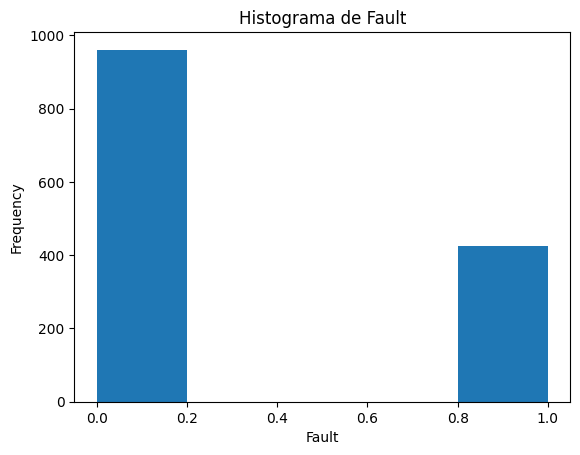

In [33]:
df['Fault'].plot.hist(bins=5)
plt.title('Histograma de Fault')
plt.xlabel('Fault')
plt.show()

Existen menos observaciones de turbinas que fallaron en comparación con las que no fallaron en el dataset, por lo que la variable está desvalanceada

In [34]:
print("Proporciones de Fault:")
print(df['Fault'].value_counts(normalize=True))

Proporciones de Fault:
Fault
0    0.693362
1    0.306638
Name: proportion, dtype: float64


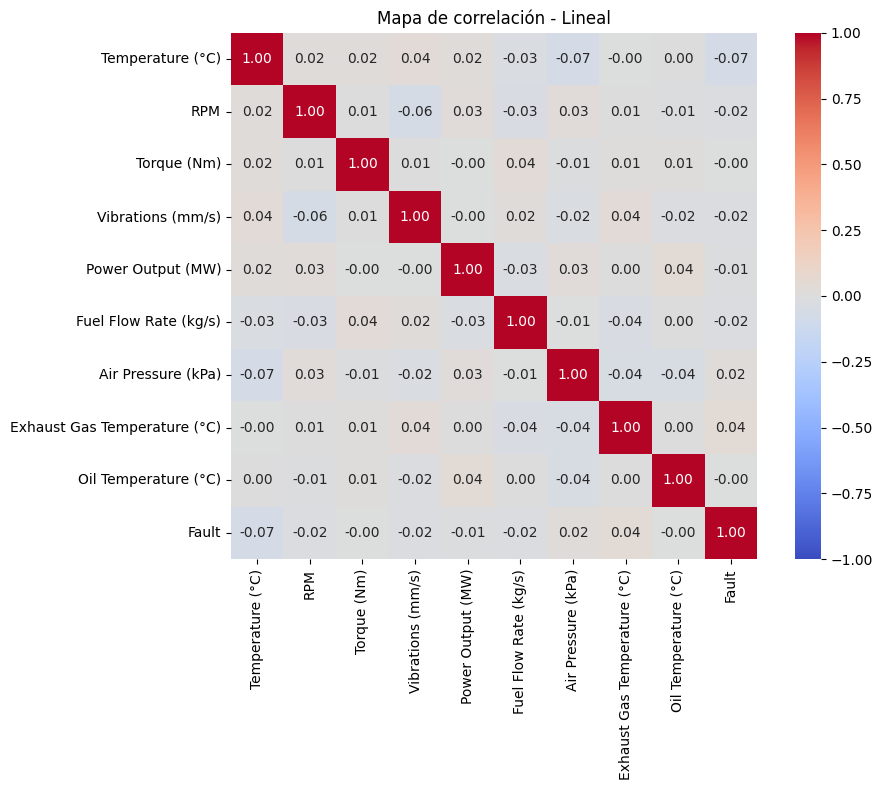

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), 
            cmap='coolwarm', 
            center=0,
            vmin=-1,    
            vmax=1,     
            annot=True,  
            fmt=".2f",   
            square=True) 
plt.title('Mapa de correlación - Lineal')
plt.tight_layout()
plt.show()

Parece que ninguna variable está relacionada linealmente, verifiquemos si pueda existir algún otro tipo de relación entre ellas

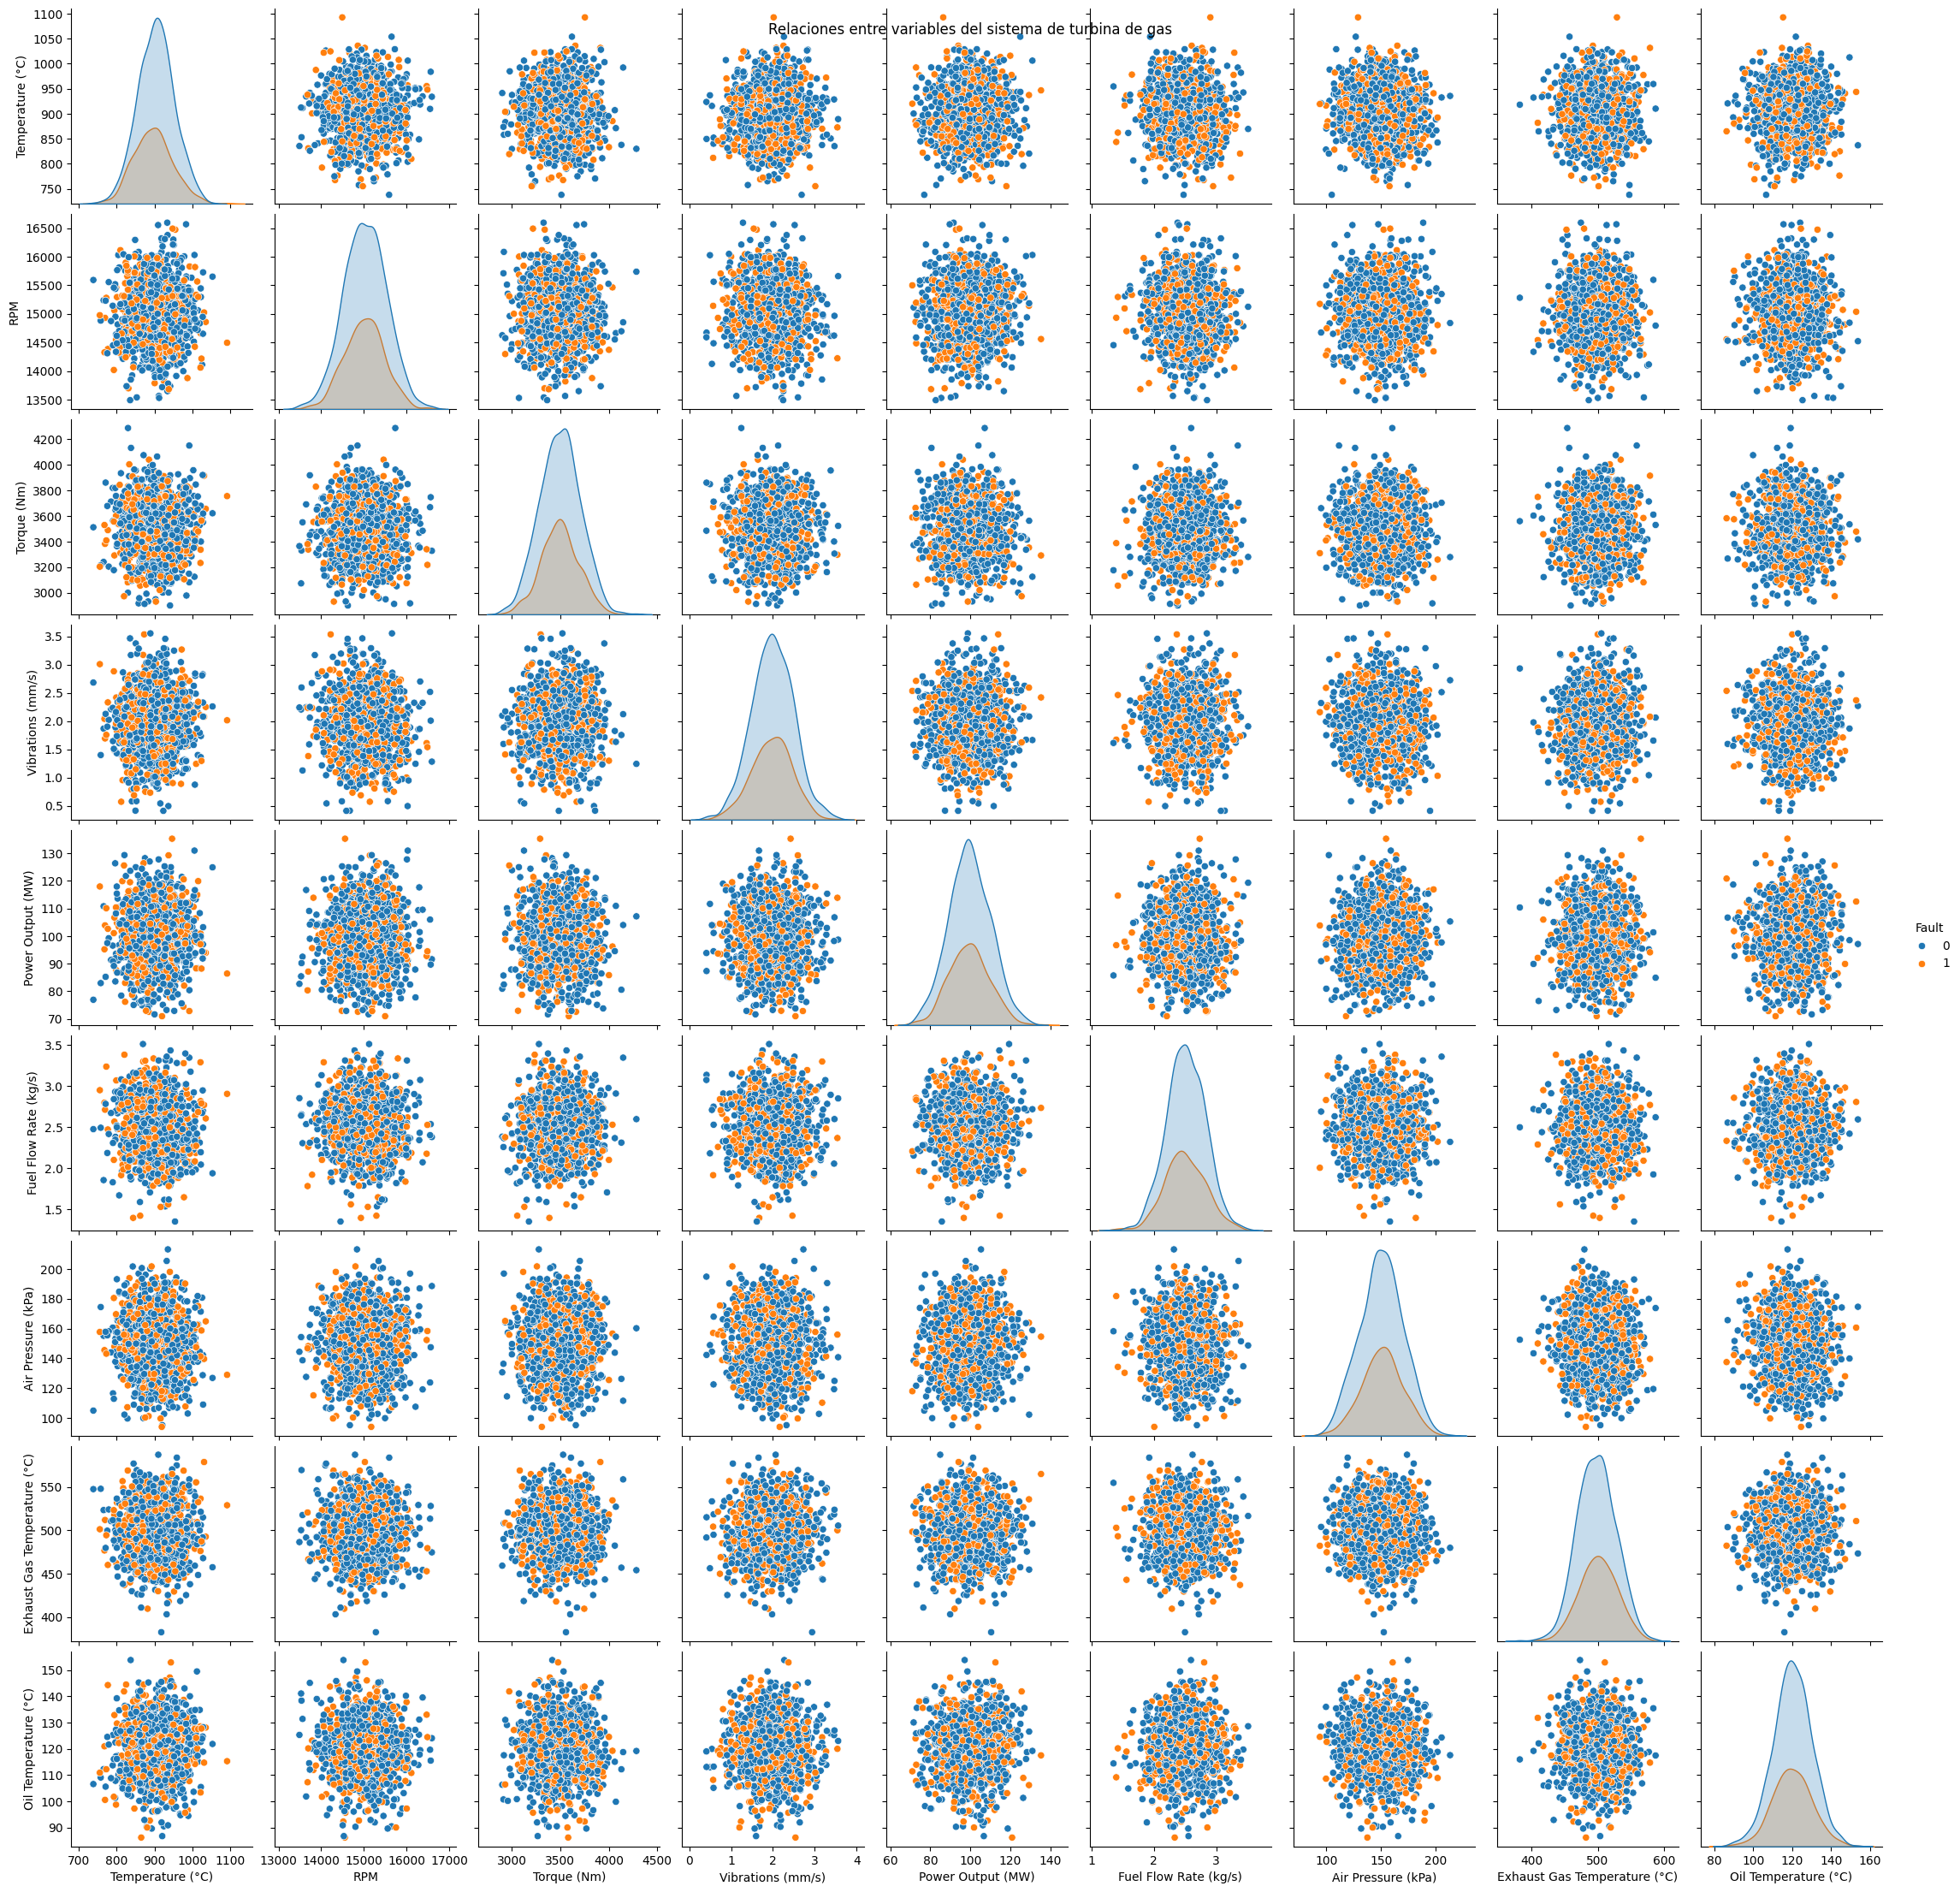

In [39]:
sns.pairplot(df, diag_kind="kde", hue="Fault")
plt.suptitle("Relaciones entre variables del sistema de turbina de gas")
plt.show()

Parece que ninguna variable está relacionada, visualicemos su relación con la variable objetivo

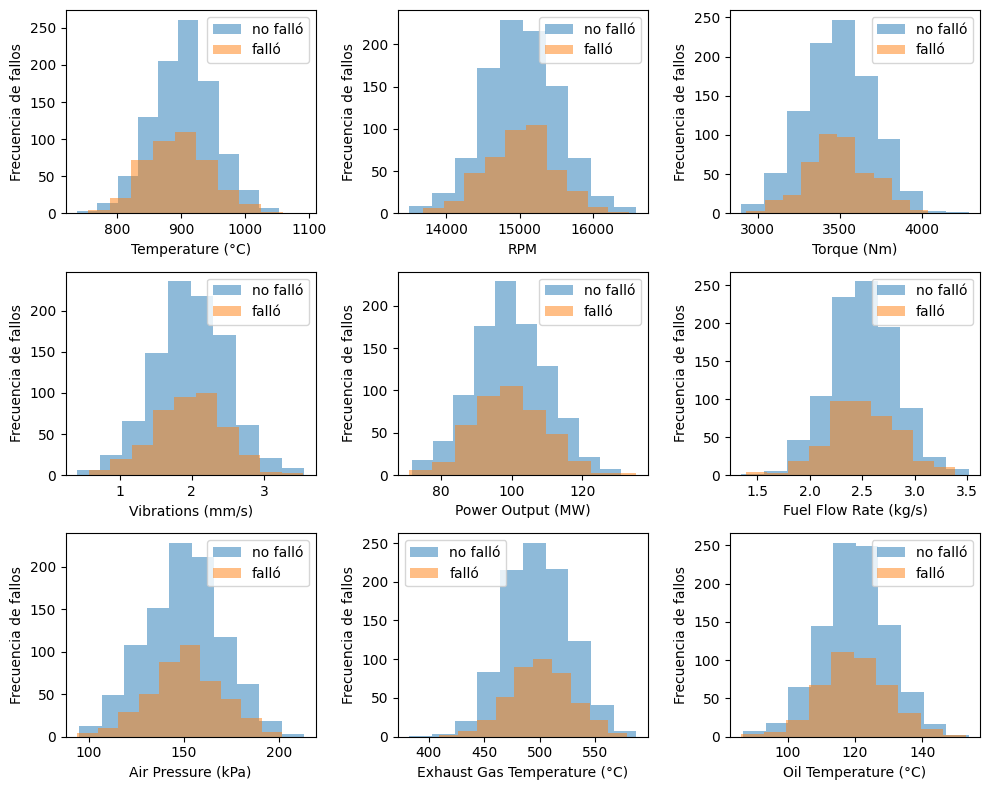

In [37]:
fig, axs = plt.subplots(3,3, figsize=(10,8))
i = 0
j = 0
for col in df:
    if i==3:
        break
    
    cat0 = df[df['Fault'] == 0][col]
    cat1 = df[df['Fault'] == 1][col]

    axs[i,j].hist(cat0, alpha=0.5, label='no falló', bins=10)
    axs[i,j].hist(cat1, alpha=0.5, label='falló', bins=10)
    axs[i,j].legend()
    axs[i,j].set_xlabel(f'{col}')
    axs[i,j].set_ylabel('Frecuencia de fallos')
    # axs[i,j].set_title('Distribución comparativa')
    j+=1
    if j==3:
        i+=1
        j=0

plt.tight_layout()
plt.show()

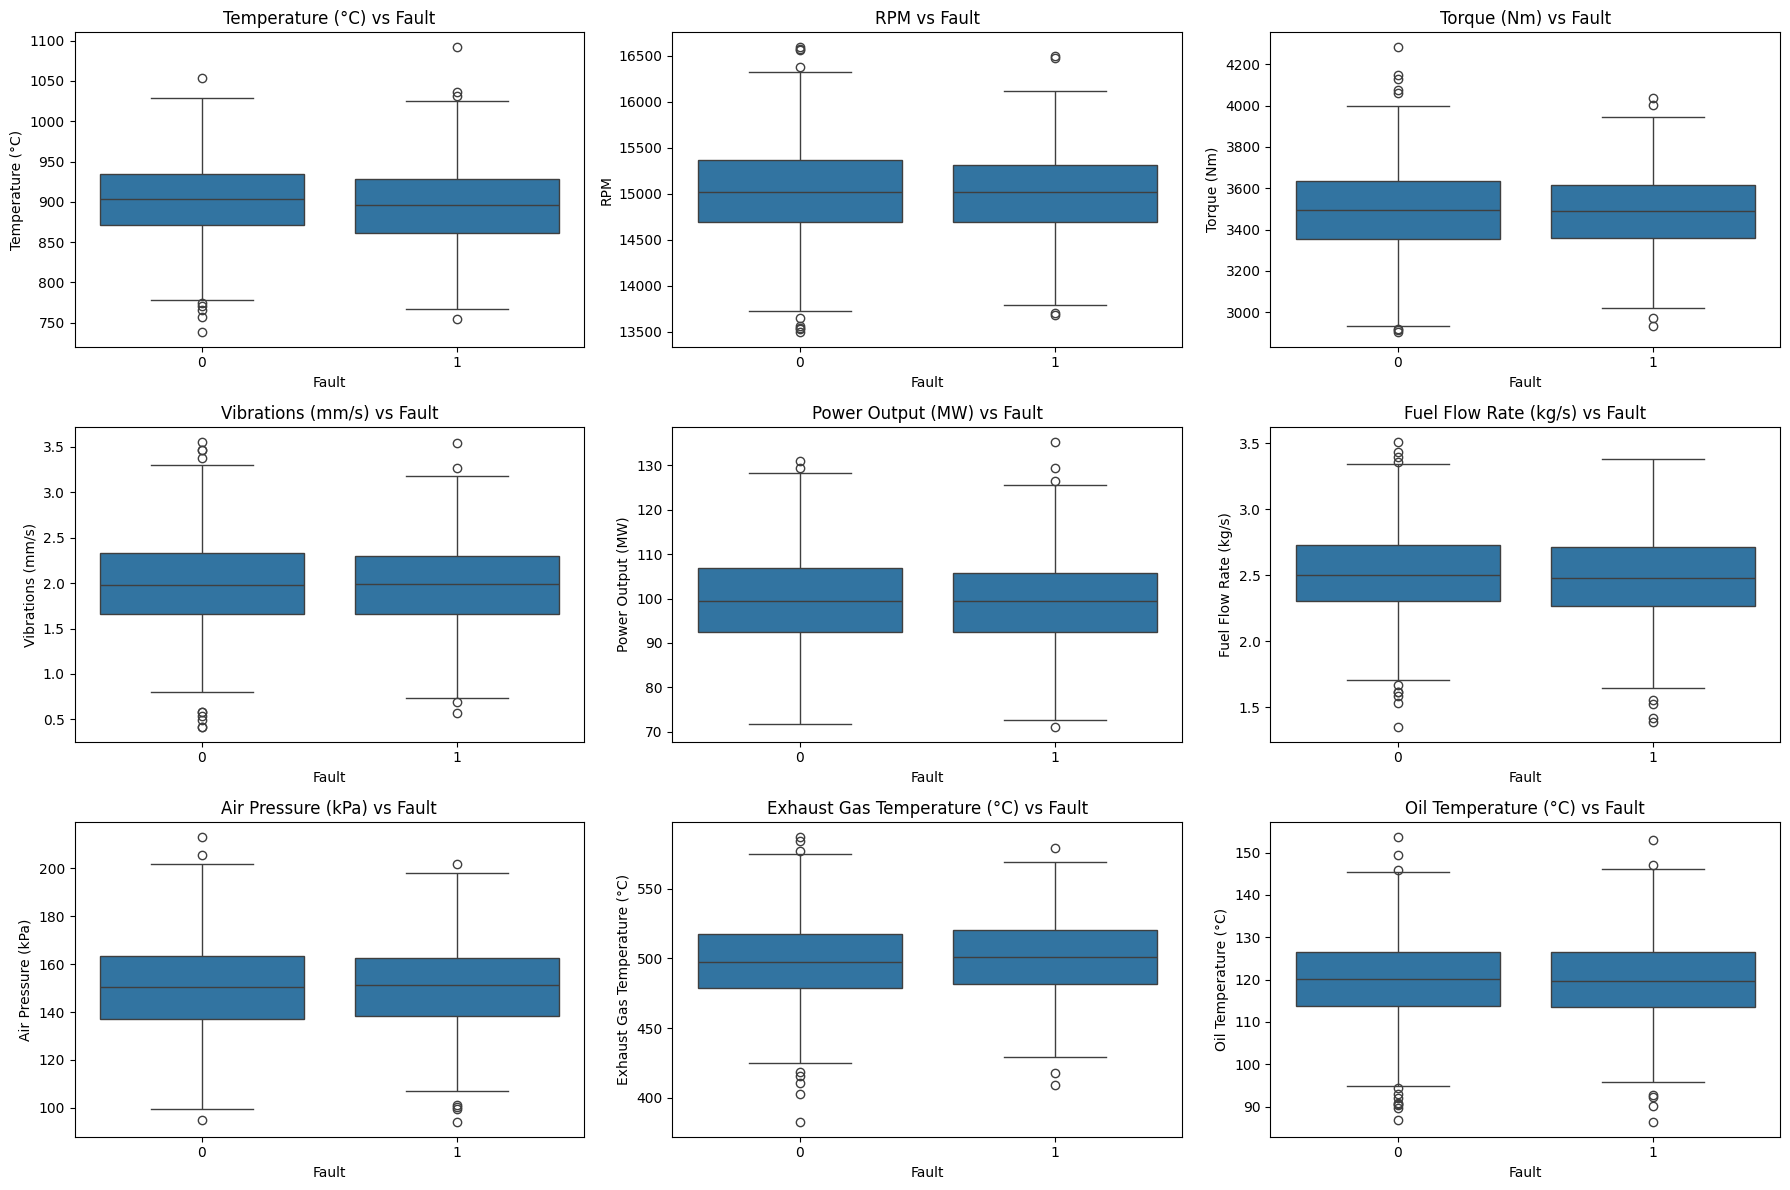

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

i = 0
j = 0
for col in df:
    if i==3:
        break
    sns.boxplot(data=df, x='Fault', y=col, ax=axes[i,j])
    # sns.violinplot(data=df, x='Fault', y=col, ax=axes[i,j])
    axes[i,j].set_title(f'{col} vs Fault')
    j+=1
    if j==3:
        i+=1
        j=0
    
plt.tight_layout()
plt.show()

Al ser un dataset sintético, todas las variables están normalizadas por lo que no se puede sacar ningún tipo de relación entre ellas. La conclusión final más evidente es que la variable target está desvalanceada y por lo tanto es un detalle a tener en cuenta en el trabajo.